<a href="https://colab.research.google.com/github/sahar-mariam/level2-report/blob/main/SVM_breastcancer_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [23]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Load the Breast Cancer dataset from scikit-learn
data = load_breast_cancer(as_frame=True)
df = data.frame
print(df)

# Select two features for visualization
feature1 = 'mean radius'
feature2 = 'mean texture'

X = df[[feature1, feature2]]
y = df['target']

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [24]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier
clf = SVC(kernel='linear', C=1.0, random_state=42)

# Train the SVM classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(confusion)
print('Classification Report:')
print(report)


Accuracy: 0.90
Confusion Matrix:
[[36  7]
 [ 4 67]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.84      0.87        43
           1       0.91      0.94      0.92        71

    accuracy                           0.90       114
   macro avg       0.90      0.89      0.90       114
weighted avg       0.90      0.90      0.90       114



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


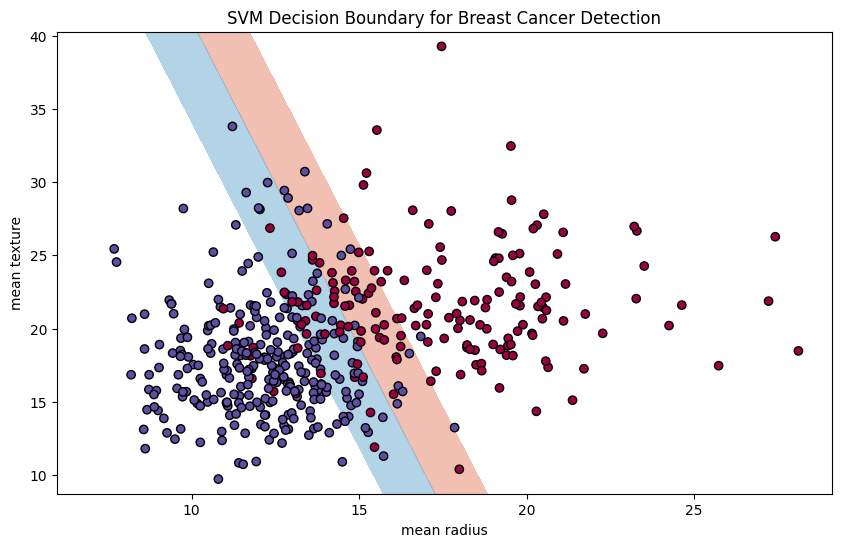

In [25]:
# Plot the decision boundary
plt.figure(figsize=(10, 6))

# Create a meshgrid to plot the decision boundary
xx, yy = np.meshgrid(
    np.linspace(X[feature1].min() - 1, X[feature1].max() + 1, 500),
    np.linspace(X[feature2].min() - 1, X[feature2].max() + 1, 500))

Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.5, cmap=plt.cm.RdBu)

# Plot the data points
plt.scatter(X_train[feature1], X_train[feature2], c=y_train, cmap=plt.cm.Spectral, edgecolor='k')

plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('SVM Decision Boundary for Breast Cancer Detection')
plt.show()

The output shows plot with contour lines representing the SVM decision boundary, and the data points spread across the 2D feature space. The contour lines show how the SVM classifier has divided the space into regions corresponding to the two classes.

The decision boundary is a line that separates data points into two classes: malignant (cancerous) and benign (non-cancerous).

The data points from the training set are color-coded based on their class labels: malignant tumors are usually displayed in one color, and benign tumors in another.